# ***Exploratory Data Analysis***

### **1. Importing Libraries**

In [73]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

### **2. Loading dataset** 

In [74]:
data = pd.read_csv('data/gurgaon_properties_cleaned(round2).csv')

In [75]:
data.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 50,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,1,0
1,flat,dlf regal gardens,sector 90,1.29,1430.0,9020.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,...,1702.0,1540.0,1430.0,1,0,0,0,0,2,174
2,flat,ireo the grand arch,sector 58,2.20,1375.0,16000.0,Carpet area: 1375 (127.74 sq.m.),2,2,1,...,NaN,NaN,1375.0,0,0,0,1,0,1,49
3,flat,ireo victory valley,sector 67,2.95,2436.0,12110.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,...,2436.0,2236.0,2036.0,0,1,0,1,0,1,165
4,flat,puri emerald bay,sector 104,2.23,2250.0,9911.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,...,2450.0,NaN,2250.0,0,1,0,0,0,1,159


### **3. Missing Values** 

In [76]:
data.isnull().sum()

property_type             0
society                   0
sector                    0
price                    18
area                     18
price_per_sqft           18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                  96
floorNum                 19
facing                  846
agePossession             0
super_built_up_area    1900
built_up_area          2070
carpet_area            1871
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3815 entries, 0 to 3814
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3815 non-null   object 
 1   society              3815 non-null   object 
 2   sector               3815 non-null   object 
 3   price                3797 non-null   float64
 4   area                 3797 non-null   float64
 5   price_per_sqft       3797 non-null   float64
 6   areaWithType         3815 non-null   object 
 7   bedRoom              3815 non-null   int64  
 8   bathroom             3815 non-null   int64  
 9   balcony              3719 non-null   object 
 10  floorNum             3796 non-null   float64
 11  facing               2969 non-null   object 
 12  agePossession        3815 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1745 non-null   float64
 15  carpet_area          1944 non-null   f

### **3. Checking duplicates**

In [78]:
# checking the duplicate values
data.duplicated().sum()

np.int64(139)

In [79]:
data[data.duplicated()]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
404,flat,shapoorji pallonji joyville gurugram,sector 102,2.12,1250.0,16960.0,Built Up area: 1852 (172.06 sq.m.)Carpet area:...,3,3,3,...,NaN,1852.0,1250.00000,0,0,0,0,0,2,72
632,flat,unitech uniworld gardens,sector 47,1.05,997.0,10531.0,Carpet area: 997 (92.62 sq.m.),2,2,2,...,NaN,NaN,997.00000,0,0,0,0,0,1,34
680,flat,bhagwati sadan,sector 12,1.15,2091.0,5500.0,Built Up area: 2000 (185.81 sq.m.),3,4,2,...,NaN,2000.0,NaN,0,1,0,0,1,2,0
684,flat,godrej,sector 79,1.29,1572.0,8206.0,Super Built up area 1572(146.04 sq.m.),2,2,3,...,1572.0,NaN,NaN,0,0,0,0,0,2,0
786,flat,shree vardhman victoria,sector 70,1.90,1950.0,9743.0,Super Built up area 1950(181.16 sq.m.),3,3,3,...,1950.0,NaN,NaN,0,1,1,1,1,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,flat,umang winter hills,sector 77,1.00,1333.0,7500.0,Carpet area: 1340 (124.49 sq.m.),2,2,2,...,NaN,NaN,1340.00000,0,0,0,0,0,2,74
3748,flat,microtek greenburg,sector 86,1.45,1480.0,9797.0,Built Up area: 1480 (137.5 sq.m.)Carpet area: ...,3,2,3,...,NaN,1480.0,1050.00000,0,0,0,0,0,0,72
3757,flat,emaar imperial gardens,sector 102,1.98,2000.0,9900.0,Carpet area: 2000 (185.81 sq.m.),3,3,3+,...,NaN,NaN,2000.00000,0,1,0,0,0,1,72
3789,flat,ats triumph,sector 104,2.00,2290.0,8733.0,Super Built up area 2290(212.75 sq.m.),3,4,3+,...,2290.0,NaN,NaN,0,1,0,0,0,2,60


These values are not actually duplicate

### **4. EDA**

#### **4.1 Property type**

In [80]:
data['property_type'].value_counts()

property_type
flat     2942
house     873
Name: count, dtype: int64

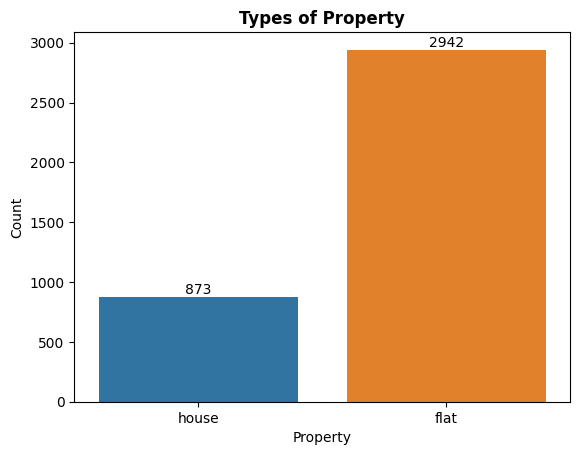

In [81]:
ax = sns.countplot(data=data, x='property_type', hue='property_type')

for bar in ax.patches:
    # Get the height of each bar (count value)
    count = bar.get_height()
    # Add the text on top of the bar
    if count > 0:  # To avoid adding text to bars with zero height
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X-coordinate
            count,                              # Y-coordinate
            int(count),                         # Text (integer count)
            ha='center',                        # Horizontal alignment
            va='bottom'                         # Vertical alignment
        )

plt.title('Types of Property', fontweight='bold')
plt.xlabel('Property')
plt.ylabel('Count')
plt.show()

This shows that 77% of the data is of flats and the remaining is of houses.

In [82]:
# Multvariate Analysis

In [83]:
data.columns

Index(['property_type', 'society', 'sector', 'price', 'area', 'price_per_sqft',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

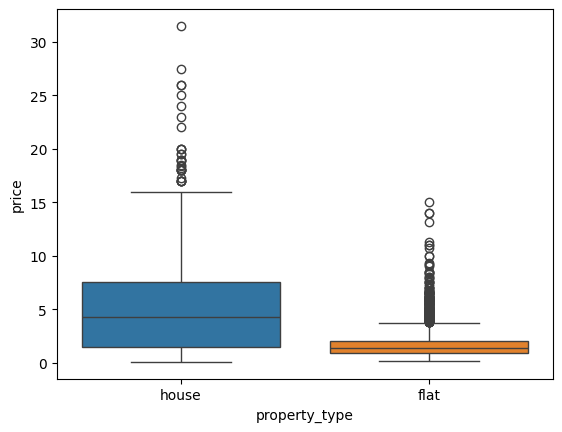

In [84]:
# Property_type vs price

sns.boxplot(data=data, x='property_type', y='price', hue='property_type')
plt.show()

From the above visualization, we observe:
- There are numerous outliers present in the data, especially for houses.There is a house having price more than 30 Cr.<br>
**For houses:**
- The median price for houses seems to be around 5 crores.
- The IQR, which represents the middle 50% of the data, is relatively small, indicating that the prices for the majority of houses are clustered within a narrow range.<br>
**For Flats:**
-  The median price for flats appears to be around 1 Crore.

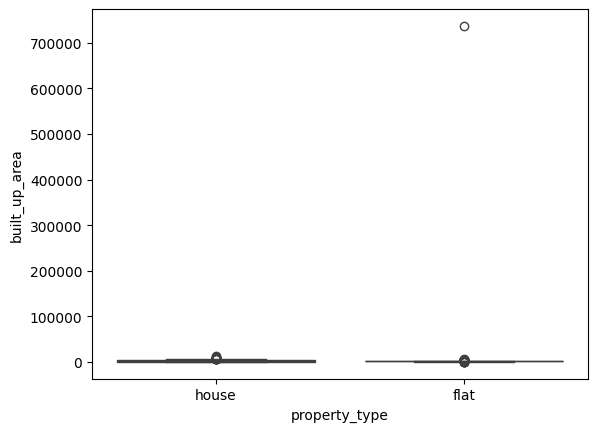

In [85]:
# property_type vs build_up_area

sns.boxplot(data=data, x='property_type', y='built_up_area', hue='property_type')
plt.show()

In [86]:
build_up_outlier = data[data['property_type']=='flat']
build_up_outlier[build_up_outlier['built_up_area']>700000]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1830,flat,hcbs sports ville,sohna road,0.35,875000.0,4.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,0,44


There is 1 outlier in flats where the built up area is extremely high i.e., 737147 thus eliminating this area

In [87]:
# removing the outlier
data = data[data['built_up_area'] != 737147.0]

<Axes: xlabel='property_type', ylabel='built_up_area'>

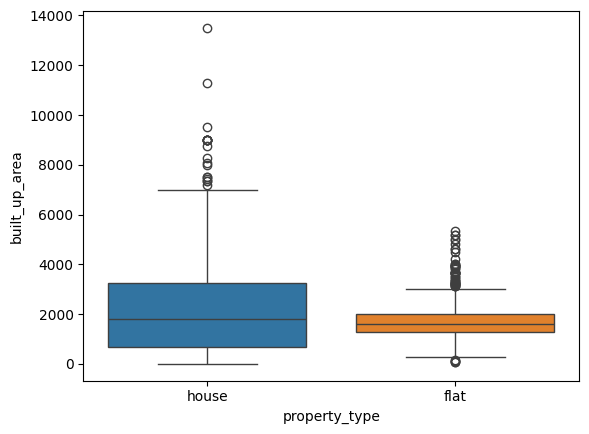

In [88]:
sns.boxplot(x=data['property_type'], y=data['built_up_area'], hue=data['property_type'])

Observations:
- The median built-up area for houses seems to be around 3000 square feet.
- The IQR for houses, is relatively small, indicating that the built-up areas for the majority of houses are clustered within a narrow range and similar can be seen in flats.
- The median built-up area for flats appears to be around 1500 square feet.

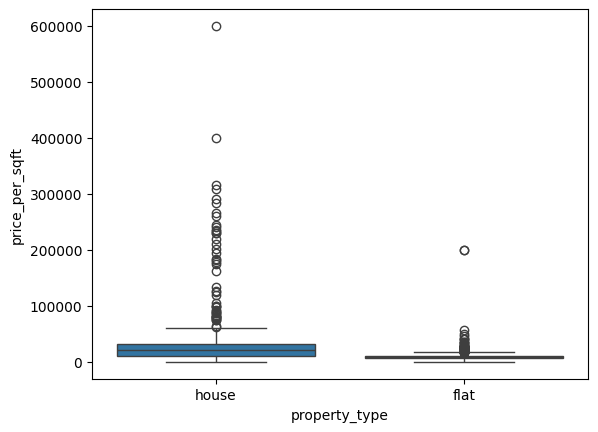

In [89]:
# property_type vs price_per_sqft

sns.boxplot(x=data['property_type'], y=data['price_per_sqft'], hue=data['property_type'])
plt.show()

In [90]:
# check outliers
data[data['price_per_sqft'] > 100000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
15,house,"bhim nagar, sector 6",sector 6,0.85,126865.0,67.0,Plot area 67(6.22 sq.m.),NaN,67.0,NaN
31,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),NaN,232.0,NaN
141,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,NaN,NaN,1600.0
405,house,independent,sector 28,4.50,125000.0,360.0,Built Up area: 360 (33.45 sq.m.),NaN,360.0,NaN
591,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),NaN,400.0,NaN
1127,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),NaN,60.0,NaN
1231,house,ardee city,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
1388,flat,ambience caitriona,sector 24,14.00,200000.0,700.0,Built Up area: 700 (65.03 sq.m.),NaN,700.0,NaN
1541,house,independent,sector 24,10.00,229885.0,435.0,Carpet area: 435 (40.41 sq.m.),NaN,NaN,435.0
1807,house,vipul tatvam villa,sector 48,7.25,201388.0,360.0,Plot area 360(33.45 sq.m.),NaN,360.0,NaN


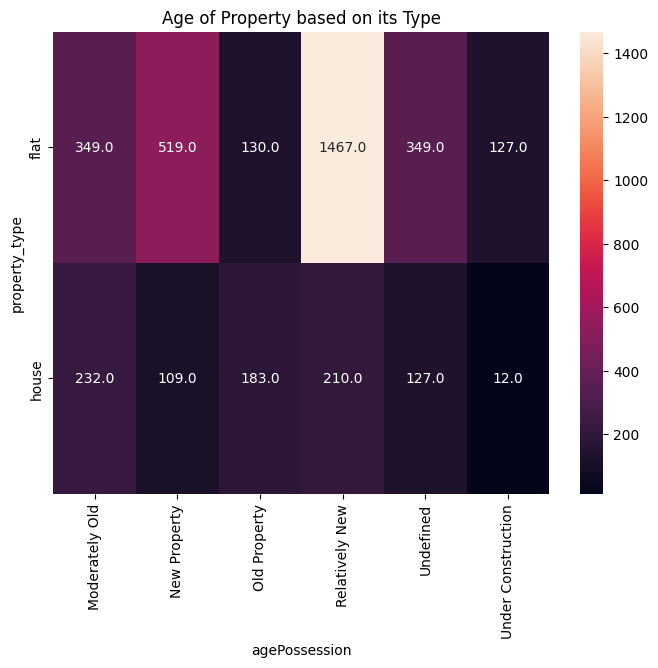

In [91]:
plt.figure(figsize=(8,6))
sns.heatmap(pd.crosstab(data['property_type'], data['agePossession']),annot=True, fmt='.1f')
plt.title('Age of Property based on its Type')
plt.show()

Observations:
- Out of 2941 flats 1467 flats are relatively new and 519 flats are New.
- In houses, 232 houses are moderatly old.

### **4.2 Society**

In [92]:
data['society'].value_counts().shape

(676,)

In [93]:
data['society'].value_counts()

society
independent                             491
tulip violet                             75
ss the leaf                              74
shapoorji pallonji joyville gurugram     45
dlf new town heights                     44
                                       ... 
antriksh green                            1
professional society                      1
park view apartment                       1
ace palm floors                           1
huda flats                                1
Name: count, Length: 676, dtype: int64

In [94]:
# Frequency distribution for societies
society_count = data['society'].value_counts()

frequency_bins = {
    "Very High (>100)": (society_count > 100).sum(),
    "High (50-100)": ((society_count >= 50) & (society_count <= 100)).sum(),
    "Average (10-49)": ((society_count >= 10) & (society_count < 50)).sum(),
    "Low (2-9)": ((society_count > 1) & (society_count < 10)).sum(),
    "Very Low (1)": (society_count == 1).sum()
}

In [95]:
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(97),
 'Low (2-9)': np.int64(285),
 'Very Low (1)': np.int64(291)}

In [96]:
# checking how many societies are independent
data[data['society']=='independent']['society'].count()

np.int64(491)

In [97]:
data['society'].count()

np.int64(3814)

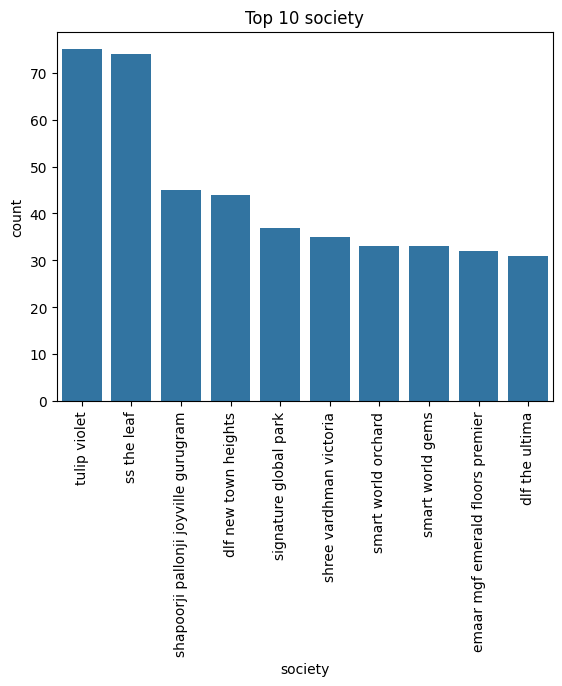

In [98]:
top_10_society = data[data['society'] != 'independent']['society'].value_counts().head(10)

sns.barplot(data=top_10_society)
plt.title("Top 10 society")
plt.xticks(rotation=90)
plt.show()

In [99]:
# missing value in society
data['society'].isnull().sum()

np.int64(0)

Observations:
- Around 12.7% properties comes under independent tag.
- There are 675 societies.
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - **Very High (>100):** Only 1 society has more than 100 listings.
    - **High (50-100):** 2 societies have between 50 to 100 listings.
    - **Average (10-49):** 92 societies fall in this range with 10 to 49 listings each.
    - **Low (2-9):** 273 societies have between 2 to 9 listings.
    - **Very Low (1):** A significant number, 308 societies, have only 1 listing.

### **4.3 Sector**

In [100]:
data['sector'].value_counts()

sector
sohna road    162
sector 102    113
sector 85     110
sector 92     105
sector 69      94
             ... 
sector 17a      3
sector 73       3
sector 17b      3
sector 88b      3
sector 37       1
Name: count, Length: 113, dtype: int64

C:\Users\aasth\AppData\Local\Temp\ipykernel_22288\381807901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y= top_10_sector.index, x=top_10_sector.values, palette='viridis')


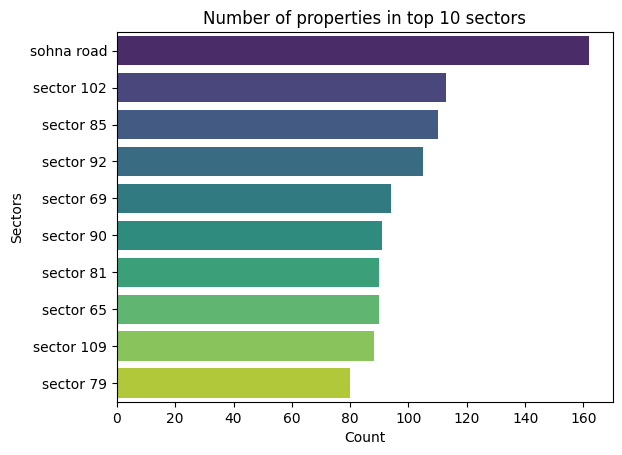

In [101]:
# top 10 Sector
top_10_sector = data['sector'].value_counts(ascending=False).head(10)

sns.barplot(y= top_10_sector.index, x=top_10_sector.values, palette='viridis')
plt.title("Number of properties in top 10 sectors")
plt.ylabel('Sectors')
plt.xlabel('Count')
plt.show()


Observations: - 
- Sohna Road have around >160 properties which the highest number of properties in any sector in gurgaon.


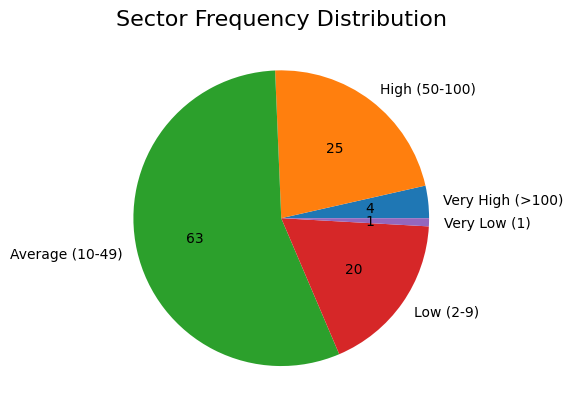

In [102]:
# Frequency distribution for sectors
sector_counts = data['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

labels = list(sector_frequency_bins.keys())
values = list(sector_frequency_bins.values())

# custom autopct function to show exact values
def autopct_with_values(pct, all_values):
    total = sum(all_values)
    absolute = int(round(pct / 100. * total))  # Calculate the absolute value
    return f"{absolute}"  # Return the exact count

# Plot the pie chart
plt.pie(
    values, 
    labels=labels, 
    autopct=lambda pct: autopct_with_values(pct, values) 
)
plt.title("Sector Frequency Distribution", fontsize=16)
plt.show()


In [103]:
data['sector'].value_counts().count()

np.int64(113)

Observations: - 
- There are 113 unique sectors.
- Frequency distribution of sectors:
    - **Very High (>100):** 4 sectors have more than 100 listings.
    - **High (50-100):** 25 sectors have between 50 to 100 listings.
    - **Average (10-49):** A majority, 63 sectors, fall in this range with 10 to 49 listings each.
    - **Low (2-9):** 20 sectors have between 2 to 9 listings.
    - **Very Low (1):** Interestingly, there are no sectors with only 1 listing.


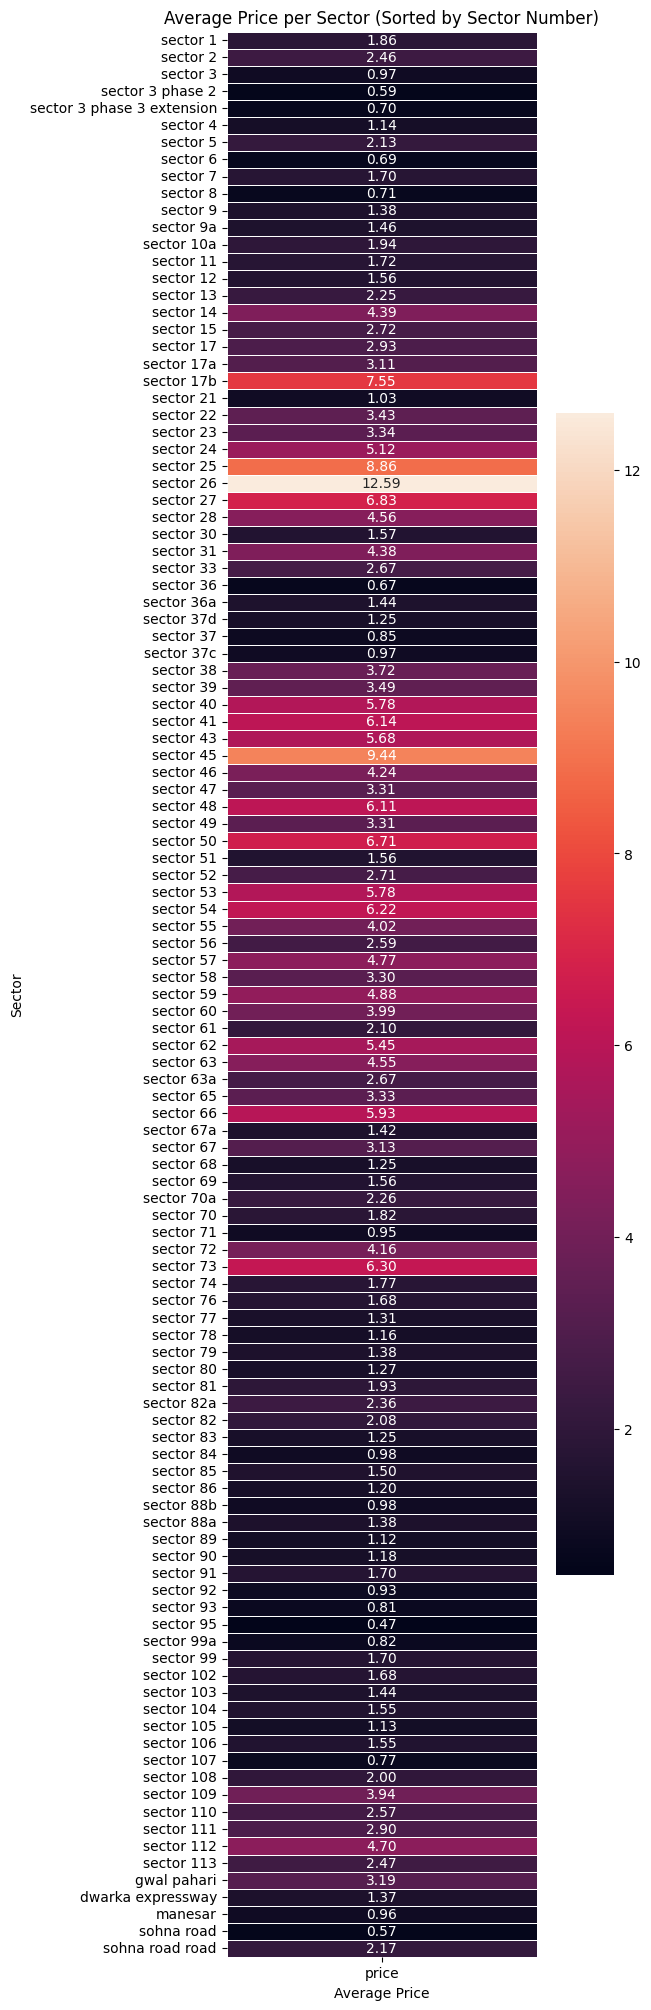

In [104]:
# Group by 'sector' and calculate the average price
avg_price_per_sector = data.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

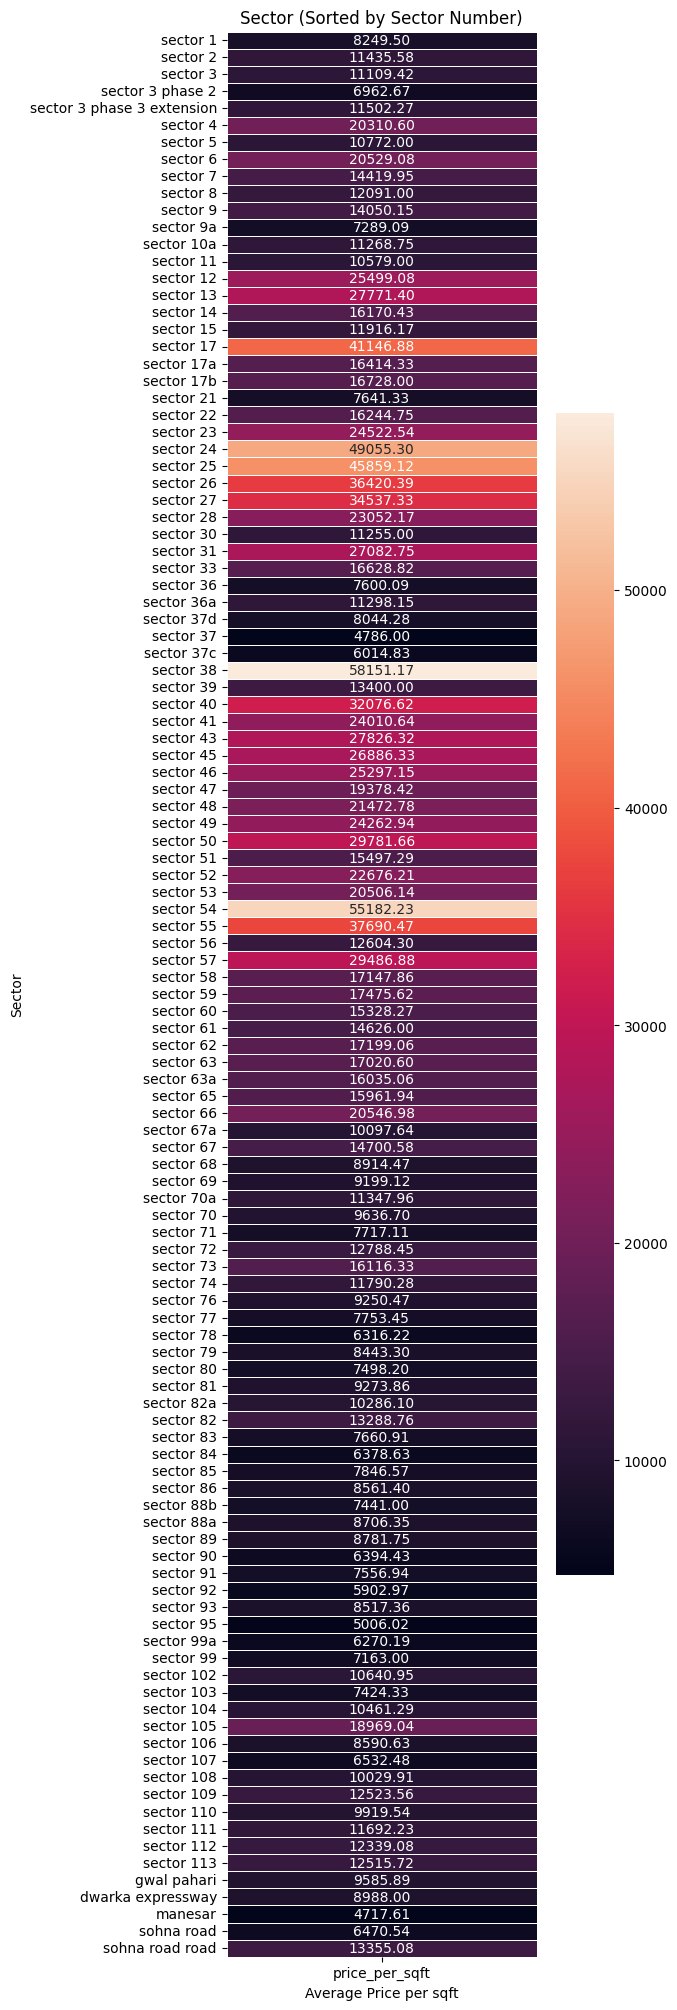

In [105]:
avg_price_per_sqft_sector = data.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

In [106]:
# Step 1: Group and calculate metrics
luxury_score = data.groupby('sector')['luxury_score'].mean().reset_index()
price_per_sqft = data.groupby('sector')['price_per_sqft'].mean().reset_index()

# Combine the two metrics into one DataFrame
sector_metrics = luxury_score.merge(price_per_sqft, on='sector')
sector_metrics['sector_number'] = sector_metrics['sector'].apply(extract_sector_number)

# Sort by sector number
sector_metrics = sector_metrics.sort_values(by='sector_number')

# Step 2: Set up the heatmap data
heatmap_data = sector_metrics.set_index('sector')[['luxury_score', 'price_per_sqft']]

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
heatmap_data_normalized = pd.DataFrame(
    scaler.fit_transform(heatmap_data), 
    columns=heatmap_data.columns, 
    index=heatmap_data.index
)
correlation = heatmap_data.corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                 luxury_score  price_per_sqft
luxury_score        1.000000       -0.069752
price_per_sqft     -0.069752        1.000000


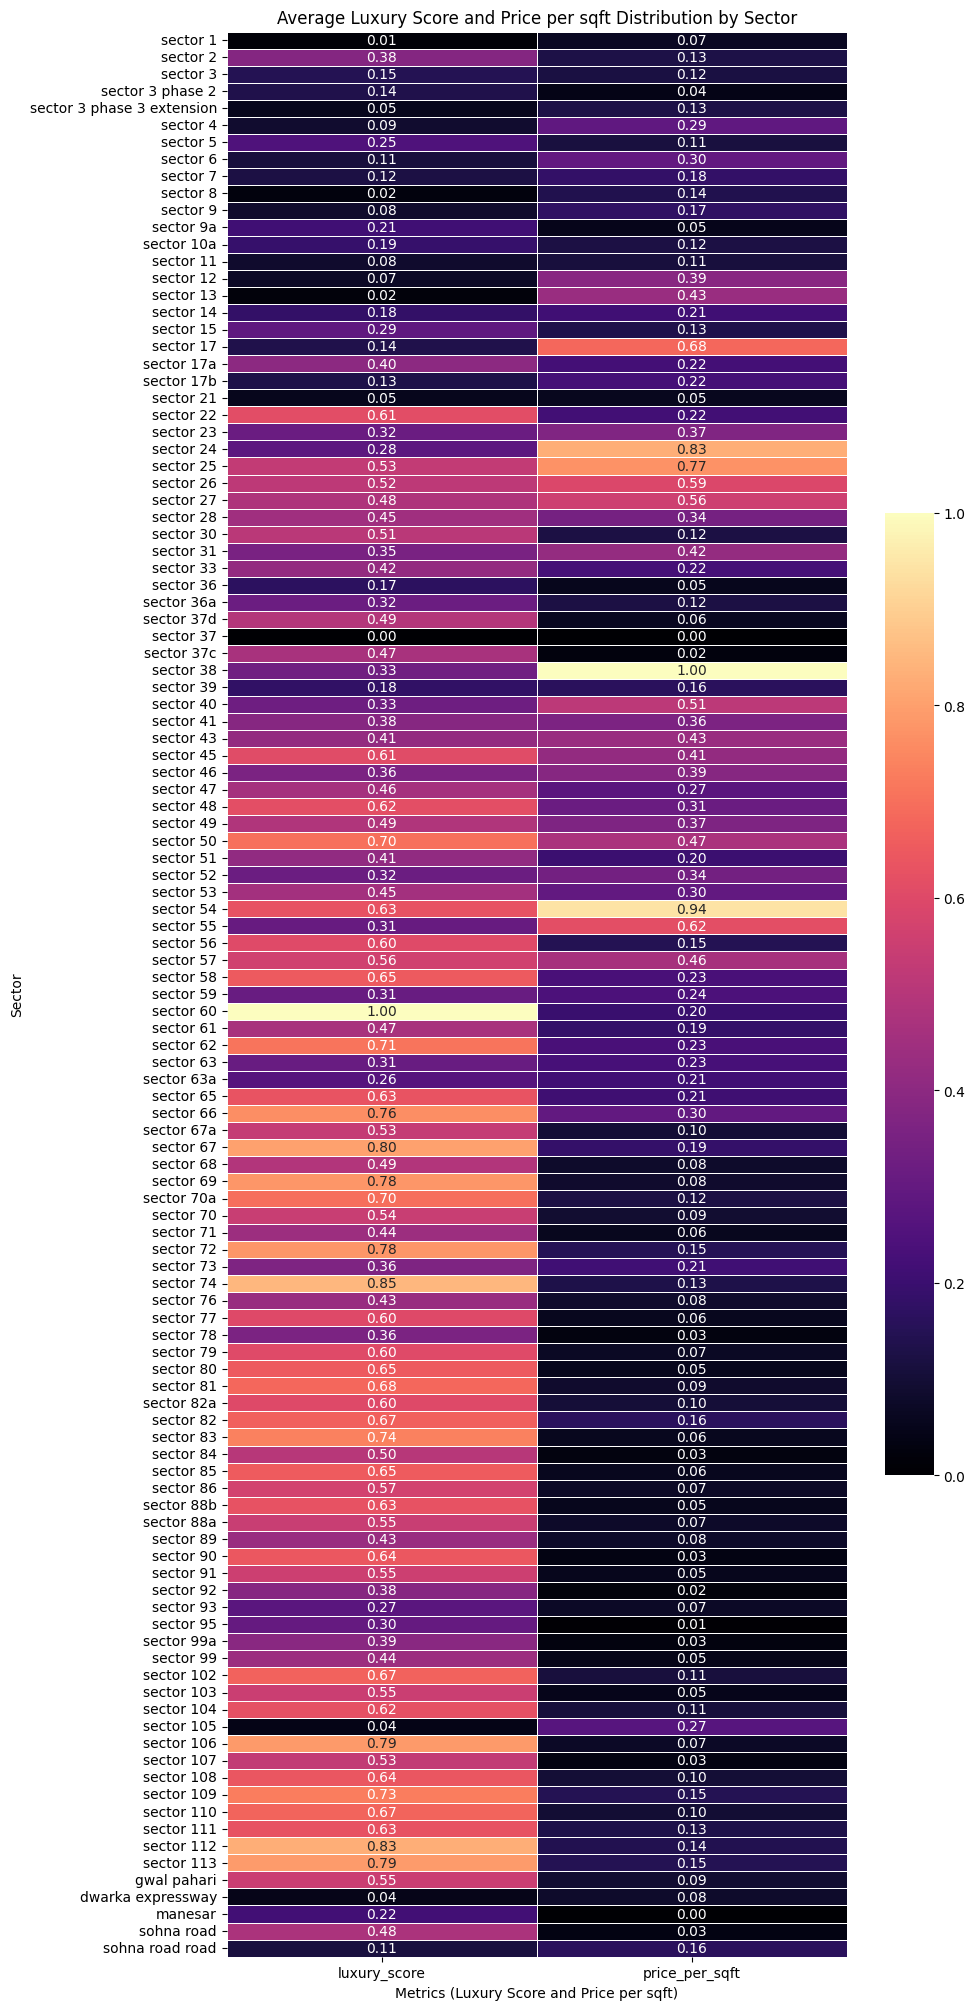

In [108]:
plt.figure(figsize=(10, 25))
sns.heatmap(heatmap_data_normalized, annot=True, fmt=".2f", linewidths=0.5, cmap="magma", cbar_kws={'shrink': 0.5})

# Step 4: Add titles and labels
plt.title("Average Luxury Score and Price per sqft Distribution by Sector")
plt.xlabel("Metrics (Luxury Score and Price per sqft)")
plt.ylabel("Sector")

plt.show()

Observations:
- **Sector 60, sector 67, sector 74** stands out with the highest luxury score but they may not necessarily align with a proportional price per sqft.
- This could mean luxury perception does not always reflect in pricing.
- **Sector 38** and **sector 54** have the highest normalized price_per_sqft.

### **4.4 price**

In [109]:
# checking the missing values in price column
data['price'].isnull().sum()

np.int64(18)

In [110]:
data['price'].describe()

count    3796.000000
mean        2.519497
std         2.961567
min         0.070000
25%         0.947500
50%         1.505000
75%         2.750000
max        31.500000
Name: price, dtype: float64

Observations:
- **Count:** There are 3,796 non-missing price entries.
- **Mean Price:** The average price is approximately 2.51 crores.
- **Median Price:** The median (or 50th percentile) price is 1.50 crores.
- **Standard Deviation:** The prices have a standard deviation of 2.96, indicating variability in the prices.
- **Range:** Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
- **IQR:** The interquartile range (difference between 75th and 25th percentile) is from 0.94 crores to 2.75 crores.

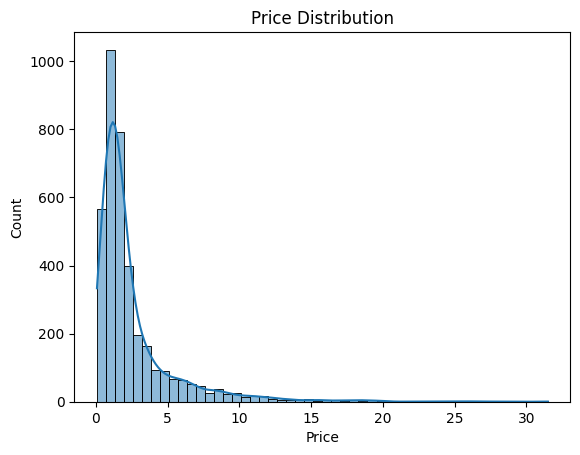

In [111]:
sns.histplot(data=data, x='price',kde=True, bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [112]:
# checking the skewness and kurtosis
price_skewness = data['price'].skew()
price_kurtosis = data['price'].kurt()

print(f"Skewness: {price_skewness}\nKurtosis: {price_kurtosis}")

Skewness: 3.288481206514864
Kurtosis: 15.028918145292003


Observation: 
- The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
- The price distribution has a **skewness of approximately 3.28**, indicating a positive skew. This means that **the distribution tail is skewed to the right**, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.
- The **kurtosis value is approximately 14.93**. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

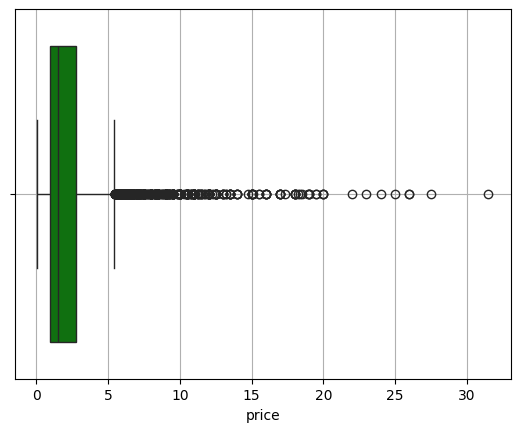

In [113]:
# checking for outliers
sns.boxplot(data=data, x='price', color='green')
plt.grid()
plt.show()

Observations: - 
- The box plot showcases the spread of the data and potential outliers. 
- Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

In [114]:
# Quantile analysis
quantile = data['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantile

0.01     0.2500
0.05     0.3700
0.95     8.4925
0.99    15.1200
Name: price, dtype: float64

Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.49 crores.
- 99% Quantile: 99% of properties are priced below 15.12 crores, indicating that very few properties are priced above this value.

In [115]:
# Identifying potential outliers using IQR method
Q1 = data['price'].describe()['25%']
Q3 = data['price'].describe()['75%']

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

print(f"Number of Outliers: {outliers.shape[0]}\n")
print(f"Descriptive statistics of oultiers:\n{outliers['price'].describe()}")

Number of Outliers: 673

Descriptive statistics of oultiers:
count    673.000000
mean       7.525661
std        3.997243
min        3.670000
25%        4.750000
50%        6.250000
75%        9.000000
max       31.500000
Name: price, dtype: float64


Based on the Outlier Analysis done by IQR method:
- There are 673 properties considered as outliers.
- These outliers have an average price of approximately 7.52 crores.
- The range for these outliers is from 3.67 crores to 31.5 crores.

C:\Users\aasth\AppData\Local\Temp\ipykernel_22288\1085307174.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bin_counts_df, x='price_bin', y='count', palette='viridis')


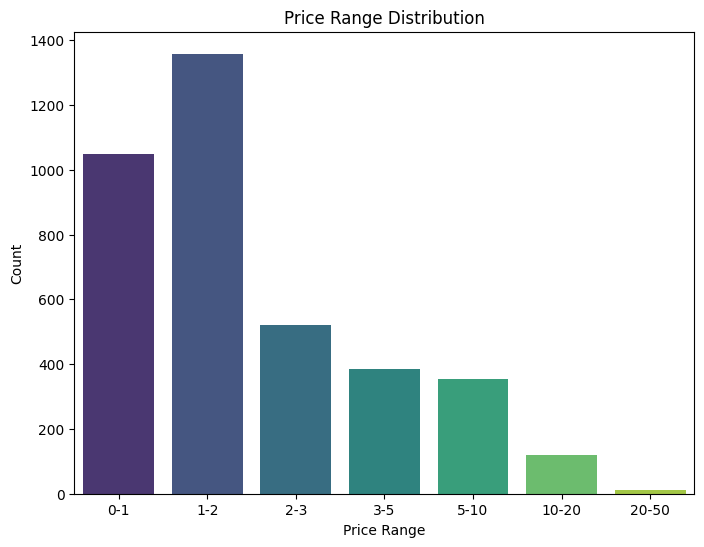

In [116]:
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]

temp_df = pd.cut(data['price'], bins=bins, labels=bin_labels, right=False)

# Counting the occurrences in each bin
bin_counts = temp_df.value_counts().sort_index()

# Convert the counts to a DataFrame for Seaborn
bin_counts_df = bin_counts.reset_index()
bin_counts_df.columns = ['price_bin', 'count']

# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=bin_counts_df, x='price_bin', y='count', palette='viridis')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Price Range Distribution')
plt.show()


Observations: 
- The majority of properties are priced in the **"1-2 crores"** and **"0-1 crores"** of range.
- There's a significant drop in the number of properties priced above **"5 crores"**.

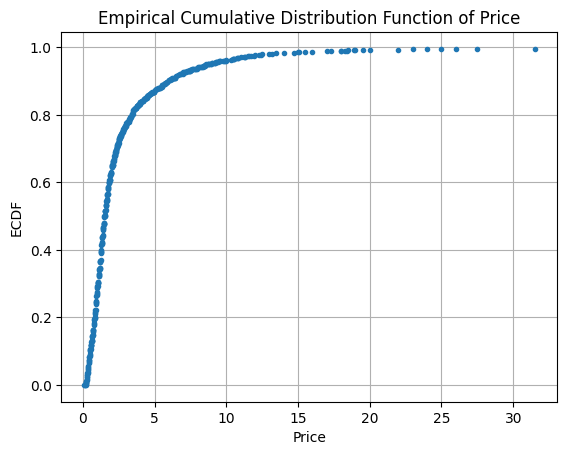

In [117]:
# Empirical Cumulative Distribution Function Plot
ecdf = data['price'].value_counts().sort_index().cumsum() / len(data['price'])

# Plot the ECDF
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.title('Empirical Cumulative Distribution Function of Price')
plt.xlabel('Price')
plt.ylabel('ECDF')
plt.grid(True)
plt.show()

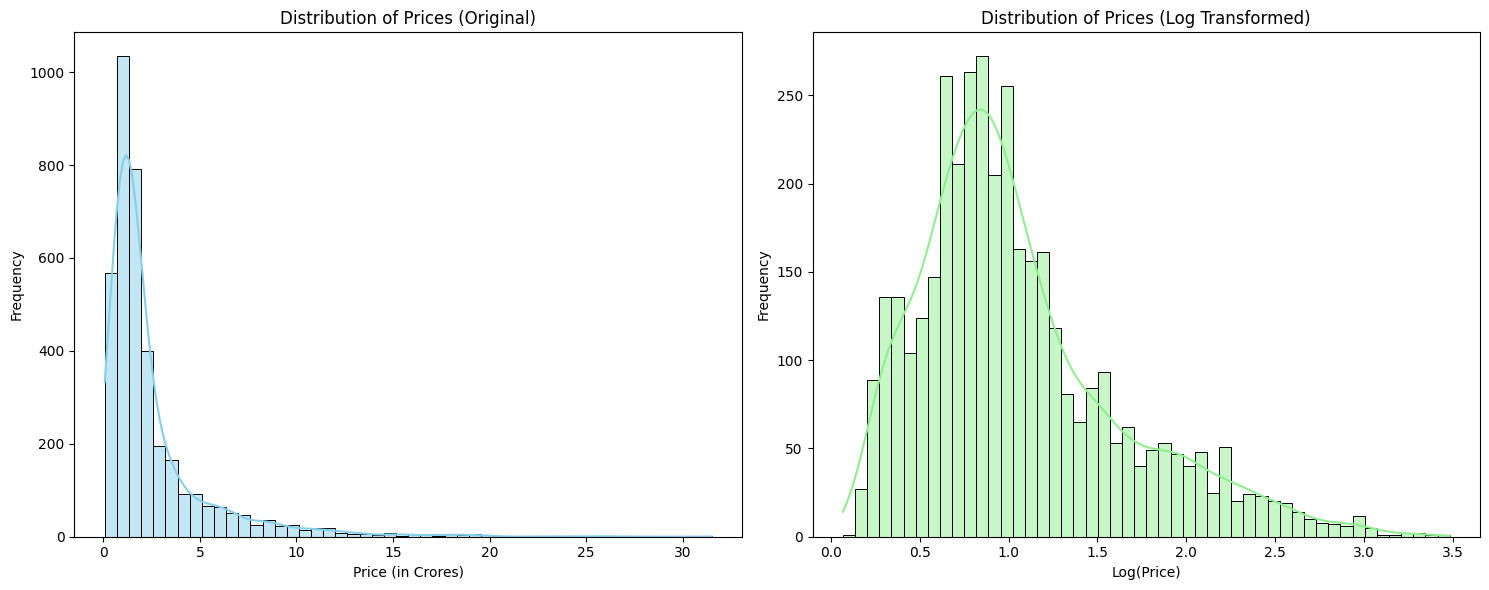

In [118]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(data['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [119]:
skewness = np.log1p(data['price']).skew()
kurtosis = np.log1p(data['price']).kurt()

print(f"Skewness: {skewness}\nKurtosis: {kurtosis}")

Skewness: 1.075471428994349
Kurtosis: 0.9756195609844931


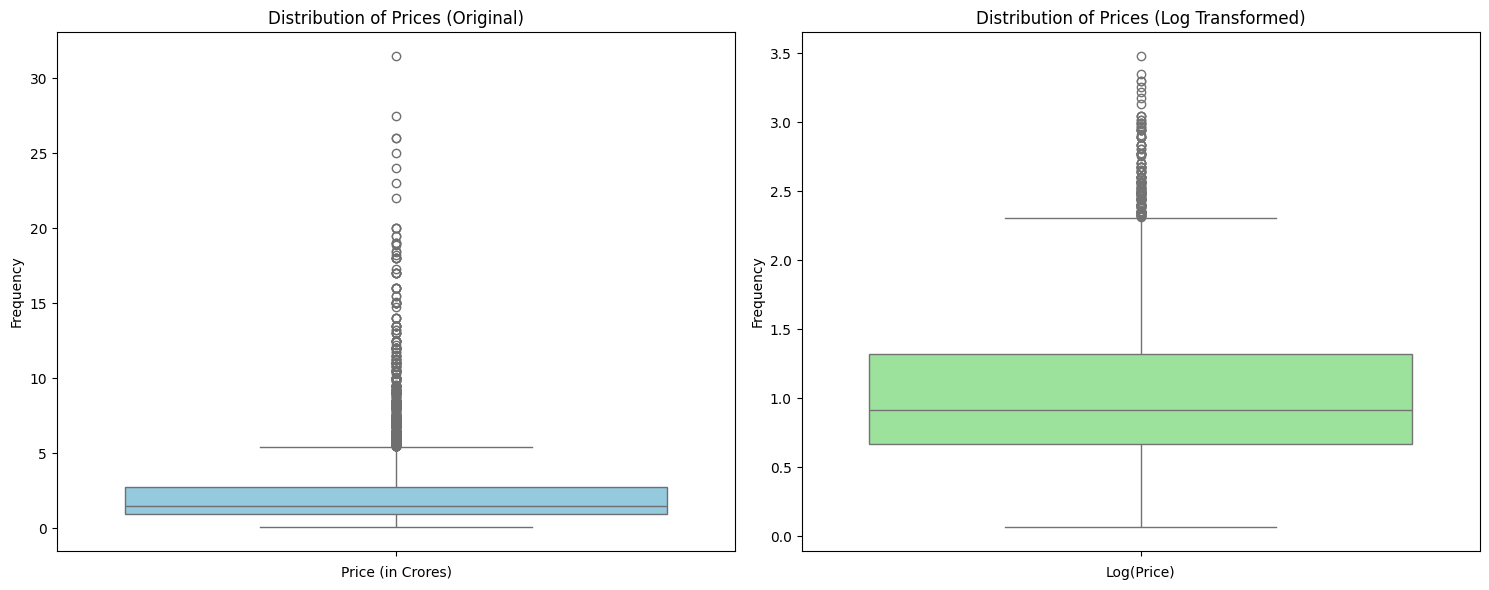

In [120]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(data['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(data['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()